# Pruebas en E-commerce Customer Behavior Dataset

Aplicaremos algoritmos de clustering sobre este dataset de e-commerce desde el punto de vista del usuario para identificar las segmentaciones que pueden haber de acuerdo a los productos que compran.

Se dividirá el conjunto en varios subconjuntos de pares de caracteristicas que sean faciles de graficar y nos den interpretaciones más claras de las segmentaciones.

<hr>
<br>

#### Información del Dataset

> This dataset provides a comprehensive view of customer behavior within an e-commerce platform. Each entry in the dataset corresponds to a unique customer, offering a detailed breakdown of their interactions and transactions. The information is crafted to facilitate a nuanced analysis of customer preferences, engagement patterns, and satisfaction levels, aiding businesses in making data-driven decisions to enhance the customer experience.

**Referencia**: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset

# 1. Leer el conjunto de datos

In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/e-commerce-customer-behavior-dataset/E-commerce Customer Behavior - Sheet1.csv')

# 2. Visualizar la información

In [4]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [7]:
# Verificar nulos
df.isna().any()

,0
Customer ID,False
Gender,False
Age,False
City,False
Membership Type,False
Total Spend,False
Items Purchased,False
Average Rating,False
Discount Applied,False
Days Since Last Purchase,False


In [9]:
df['Satisfaction Level'].isna().value_counts()

,count
Satisfaction Level,
False,348
True,2


In [10]:
# Eliminar filas con nulos
df = df.dropna()

In [11]:
# Verificar nulos
df.isna().any()

,0
Customer ID,False
Gender,False
Age,False
City,False
Membership Type,False
Total Spend,False
Items Purchased,False
Average Rating,False
Discount Applied,False
Days Since Last Purchase,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 348 entries, 0 to 349

Data columns (total 11 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   Customer ID               348 non-null    int64  

 1   Gender                    348 non-null    object 

 2   Age                       348 non-null    int64  

 3   City                      348 non-null    object 

 4   Membership Type           348 non-null    object 

 5   Total Spend               348 non-null    float64

 6   Items Purchased           348 non-null    int64  

 7   Average Rating            348 non-null    float64

 8   Discount Applied          348 non-null    bool   

 9   Days Since Last Purchase  348 non-null    int64  

 10  Satisfaction Level        348 non-null    object 

dtypes: bool(1), float64(2), int64(4), object(4)

memory usage: 30.2+ KB


In [13]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


## 3. Preprocesar el conjunto

In [16]:
# Eliminar el CustomerID
df = df.drop('Customer ID', axis=1)

In [17]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [19]:
# Separar columnas numericas y cateforicas
df_num = df.select_dtypes(include=[int, float])
df_cat = df.select_dtypes(include=[object])

In [20]:
df_num.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,29,1120.20,14,4.6,25
1,34,780.50,11,4.1,18
2,43,510.75,9,3.4,42
3,30,1480.30,19,4.7,12
4,27,720.40,13,4.0,55


In [21]:
df_cat.head()

,Gender,City,Membership Type,Satisfaction Level
0,Female,New York,Gold,Satisfied
1,Male,Los Angeles,Silver,Neutral
2,Female,Chicago,Bronze,Unsatisfied
3,Male,San Francisco,Gold,Satisfied
4,Male,Miami,Silver,Unsatisfied


### Columnas numéricas

In [18]:
# Pipeline para columnas numericas (Rellenar nulos con la mediana y escalar valores distantes)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [22]:
df_prep = num_pipeline.fit_transform(df_num)
df_prep = pd.DataFrame(df_prep, columns=df_num.columns, index=df_num.index)

In [23]:
# Antes
df_num.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,29,1120.20,14,4.6,25
1,34,780.50,11,4.1,18
2,43,510.75,9,3.4,42
3,30,1480.30,19,4.7,12
4,27,720.40,13,4.0,55


In [24]:
# Ahora
df_prep.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,-0.428571,0.519203,0.333333,0.5,0.086957
1,0.285714,0.000458,-0.166667,0.0,-0.217391
2,1.571429,-0.411468,-0.500000,-0.7,0.826087
3,-0.285714,1.069100,1.166667,0.6,-0.478261
4,-0.714286,-0.091319,0.166667,-0.1,1.391304


### Codificar columnas categoricas

In [25]:
# Codificar cada columna categorica
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Función para codificar y reducir dimensionalidad de una columna categórica
def encode_and_reduce(df, column_name, n_components=1):
    # Codificar con one-hot encoding
    df_encoded = pd.get_dummies(df[column_name], prefix=column_name)

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df_encoded)

    # Convertir a DataFrame con nombres de columna personalizados
    df_pca = pd.DataFrame(df_pca, columns=[column_name], index=df.index)

    return df_pca

# Procesar cada columna categórica
df_gender_pca = encode_and_reduce(df_cat, 'Gender', n_components=1)
df_city_pca = encode_and_reduce(df_cat, 'City', n_components=1)
df_membertype_pca = encode_and_reduce(df_cat, 'Membership Type', n_components=1)
df_satislvl_pca = encode_and_reduce(df_cat, 'Satisfaction Level', n_components=1)


In [26]:
df_gender_pca.head()

,Gender
0,0.711171
1,-0.703043
2,0.711171
3,-0.703043
4,-0.703043


In [27]:
# Volver a unificar las columnas categoricas ahora codificadas
df_cat = pd.concat([df_gender_pca, df_city_pca, df_membertype_pca, df_satislvl_pca], axis=1)
df_cat.head()

,Gender,City,Membership Type,Satisfaction Level
0,0.711171,-7.071068e-01,7.071068e-01,0.758471
1,-0.703043,7.071068e-01,-7.071068e-01,-0.218898
2,0.711171,-2.619765e-15,-3.401094e-15,-0.615404
3,-0.703043,5.842770e-15,7.071068e-01,0.758471
4,-0.703043,-1.502942e-14,-7.071068e-01,-0.615404


In [28]:
# Unificar columnas categoricas y numericas preprocesadas
df_prep = pd.concat([df_prep, df_cat], axis=1)
df_prep.head(10)

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender,City,Membership Type,Satisfaction Level
0,-0.428571,0.519203,0.333333,0.5,0.086957,0.711171,-7.071068e-01,7.071068e-01,0.758471
1,0.285714,0.000458,-0.166667,0.0,-0.217391,-0.703043,7.071068e-01,-7.071068e-01,-0.218898
2,1.571429,-0.411468,-0.500000,-0.7,0.826087,0.711171,-2.619765e-15,-3.401094e-15,-0.615404
3,-0.285714,1.069100,1.166667,0.6,-0.478261,-0.703043,5.842770e-15,7.071068e-01,0.758471
4,-0.714286,-0.091319,0.166667,-0.1,1.391304,-0.703043,-1.502942e-14,-7.071068e-01,-0.615404
5,0.714286,-0.518287,-0.666667,-1.0,-0.043478,0.711171,9.417798e-17,-3.401094e-15,-0.218898
6,-0.142857,0.565626,0.500000,0.4,0.217391,0.711171,-7.071068e-01,7.071068e-01,0.758471
7,0.428571,0.031610,0.000000,0.1,-0.391304,-0.703043,7.071068e-01,-7.071068e-01,-0.218898
8,1.285714,-0.435138,-0.333333,-0.5,0.739130,0.711171,-2.619765e-15,-3.401094e-15,-0.615404
9,-0.571429,1.129877,1.500000,0.7,-0.608696,-0.703043,5.842770e-15,7.071068e-01,0.758471


## 4. Dividir el conjunto de datos en pares de categorias que podrían mostrar agrupaciones interesantes.

* Age - TotalSpend
* MembershipType - Gender
* Gender - TotalSpend
* Gender - SatisfactionLevel
* City - AvgRating
* ItemsPurchased - MembershipType
* Days Since Last Purchase - Gender

In [30]:
# Con los valores preprocesados
age_totalspend = df_prep[['Age', 'Total Spend']]
memberType_gender = df_prep[['Membership Type', 'Gender']]
gender_totalspend = df_prep[['Gender', 'Total Spend']]
gender_satislvl = df_prep[['Gender', 'Satisfaction Level']]
city_avgrating = df_prep[['City', 'Average Rating']]
itemsPurchased_membertype = df_prep[['Items Purchased', 'Membership Type']]
daysSinceLastPurchase_gender = df_prep[['Days Since Last Purchase', 'Gender']]

In [31]:
# Con los valores originales
age_totalspend_orig = df[['Age', 'Total Spend']]
memberType_gender_orig = df[['Membership Type', 'Gender']]
gender_totalspend_orig = df[['Gender', 'Total Spend']]
gender_satislvl_orig = df[['Gender', 'Satisfaction Level']]
city_avgrating_orig = df[['City', 'Average Rating']]
itemsPurchased_membertype_orig = df[['Items Purchased', 'Membership Type']]
daysSinceLastPurchase_gender_orig = df[['Days Since Last Purchase', 'Gender']]

In [32]:
age_totalspend.head()

,Age,Total Spend
0,-0.428571,0.519203
1,0.285714,0.000458
2,1.571429,-0.411468
3,-0.285714,1.069100
4,-0.714286,-0.091319


In [33]:
age_totalspend_orig.head()

,Age,Total Spend
0,29,1120.20
1,34,780.50
2,43,510.75
3,30,1480.30
4,27,720.40


## 5. Seleccionar el mejor modelo (KMEANS)

Aplicar RandomizedSearchCV para encontrar los mejores hiperparámetros del modelo.

In [34]:
# Preparamos el metodo
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el espacio de búsqueda para los hiperparámetros de KMeans
param_dist_kmeans = {
    'n_clusters': randint(2, 10),  # entre 2 y 10 clusters
    'init': ['k-means++', 'random'],  # inicialización de los centros de los clusters
    'max_iter': randint(100, 500),  # número máximo de iteraciones
    'n_init': randint(10, 50),  # número de inicializaciones
    'tol': [1e-4, 1e-3, 1e-2]  # tolerancia para el criterio de convergencia
}

# Crear el modelo KMeans
model_kmeans = KMeans()

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
best_kmeans = RandomizedSearchCV(
    model_kmeans,
    param_distributions=param_dist_kmeans,
    n_iter=20,  # número de iteraciones
    cv=3,  # número de validaciones cruzadas
    scoring='accuracy',  # como no es supervisado, usamos el número de clústeres encontrados
    n_jobs=-1
)

In [35]:
# Ajustar el modelo a los datos
best_kmeans_age_totalspend = best_kmeans.fit(age_totalspend)
best_kmeans_memberType_gender = best_kmeans.fit(memberType_gender)
best_kmeans_gender_totalspend = best_kmeans.fit(gender_totalspend)
best_kmeans_gender_satislvl = best_kmeans.fit(gender_satislvl)
best_kmeans_city_avgrating = best_kmeans.fit(city_avgrating)
best_kmeans_itemsPurchased_membertype = best_kmeans.fit(itemsPurchased_membertype)
best_kmeans_daysSinceLastPurchase_gender = best_kmeans.fit(daysSinceLastPurchase_gender)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

 nan nan]

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

 nan nan]

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast

  _data = np.array(data, dtype=dtype, copy=copy,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

 nan nan]

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered

In [36]:
# Ver los mejores parámetros encontrados
print(f"Mejores parámetros encontrados age_totalspend: {best_kmeans_age_totalspend.best_params_}")
print(f"Mejores parámetros encontrados memberType_gender: {best_kmeans_memberType_gender.best_params_}")
print(f"Mejores parámetros encontrados gender_totalspend: {best_kmeans_gender_totalspend.best_params_}")
print(f"Mejores parámetros encontrados gender_satislvl: {best_kmeans_gender_satislvl.best_params_}")
print(f"Mejores parámetros encontrados city_avgrating: {best_kmeans_city_avgrating.best_params_}")
print(f"Mejores parámetros encontrados itemsPurchased_membertype: {best_kmeans_itemsPurchased_membertype.best_params_}")
print(f"Mejores parámetros encontrados daysSinceLastPurchase_gender: {best_kmeans_daysSinceLastPurchase_gender.best_params_}")

Mejores parámetros encontrados age_totalspend: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}

Mejores parámetros encontrados memberType_gender: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}

Mejores parámetros encontrados gender_totalspend: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}

Mejores parámetros encontrados gender_satislvl: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}

Mejores parámetros encontrados city_avgrating: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}

Mejores parámetros encontrados itemsPurchased_membertype: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}

Mejores parámetros encontrados daysSinceLastPurchase_gender: {'init': 'random', 'max_iter': 423, 'n_clusters': 8, 'n_init': 17, 'tol': 0.0001}


In [37]:
# Obtener los modelos
model_age_totalspend = best_kmeans_age_totalspend.best_estimator_
model_memberType_gender = best_kmeans_memberType_gender.best_estimator_
model_gender_totalspend = best_kmeans_gender_totalspend.best_estimator_
model_gender_satislvl = best_kmeans_gender_satislvl.best_estimator_
model_city_avgrating = best_kmeans_city_avgrating.best_estimator_
model_itemsPurchased_membertype = best_kmeans_itemsPurchased_membertype.best_estimator_
model_daysSinceLastPurchase_gender = best_kmeans_daysSinceLastPurchase_gender.best_estimator_

In [38]:
# Predecir los resultados
clusters_age_totalspend = model_age_totalspend.fit_predict(age_totalspend)
clusters_memberType_gender = model_memberType_gender.fit_predict(memberType_gender)
clusters_gender_totalspend = model_gender_totalspend.fit_predict(gender_totalspend)
clusters_gender_satislvl = model_gender_satislvl.fit_predict(gender_satislvl)
clusters_city_avgrating = model_city_avgrating.fit_predict(city_avgrating)
clusters_itemsPurchased_membertype = model_itemsPurchased_membertype.fit_predict(itemsPurchased_membertype)
clusters_daysSinceLastPurchase_gender = model_daysSinceLastPurchase_gender.fit_predict(daysSinceLastPurchase_gender)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.

  return fit_method(estimator, *args, **kwargs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.

  return fit_method(estimator, *args, **kwargs)


## 6. Evaluar los modelos

Evaluaremos los modelos con 3 indicadores

* **Shiloutte**: Esta metrica se comprende entre -1 y 1, donde mas cercano a -1 los clusters estan mal formados, mientras mas cerca a 0 los clusters se estan sobreponiendo y mientras mas cercano a 1 los clusters estan bien formados.
* **Calinski harabasz**: Cuanto mayor es el puntaje mejor compuestos estan los clusters. Generalmente se lo usa para comparaciones entre varios algortimos de clustering.

In [39]:
from sklearn import metrics

In [40]:
# Shiloutte
print("age_totalspend: ", metrics.silhouette_score(age_totalspend, clusters_age_totalspend))
print("memberType_gender: ", metrics.silhouette_score(memberType_gender, clusters_memberType_gender))
print("gender_totalspend: ", metrics.silhouette_score(gender_totalspend, clusters_gender_totalspend))
print("gender_satislvl: ", metrics.silhouette_score(gender_satislvl, clusters_gender_satislvl))
print("city_avgrating: ", metrics.silhouette_score(city_avgrating, clusters_city_avgrating))
print("itemsPurchased_membertype: ", metrics.silhouette_score(itemsPurchased_membertype, clusters_itemsPurchased_membertype))
print("daysSinceLastPurchase_gender: ", metrics.silhouette_score(daysSinceLastPurchase_gender, clusters_daysSinceLastPurchase_gender))

age_totalspend:  0.769742302533992

memberType_gender:  0.9971264318145555

gender_totalspend:  0.7678275966071477

gender_satislvl:  0.9999999900349145

city_avgrating:  0.7567992823953599

itemsPurchased_membertype:  0.7165438115110985

daysSinceLastPurchase_gender:  0.5999546767280296


In [41]:
# Calinski harabasz
print("age_totalspend: ", metrics.calinski_harabasz_score(age_totalspend, clusters_age_totalspend))
print("memberType_gender: ", metrics.calinski_harabasz_score(memberType_gender, clusters_memberType_gender))
print("gender_totalspend: ", metrics.calinski_harabasz_score(gender_totalspend, clusters_gender_totalspend))
print("gender_satislvl: ", metrics.calinski_harabasz_score(gender_satislvl, clusters_gender_satislvl))
print("city_avgrating: ", metrics.calinski_harabasz_score(city_avgrating, clusters_city_avgrating))
print("itemsPurchased_membertype: ", metrics.calinski_harabasz_score(itemsPurchased_membertype, clusters_itemsPurchased_membertype))
print("daysSinceLastPurchase_gender: ", metrics.calinski_harabasz_score(daysSinceLastPurchase_gender, clusters_daysSinceLastPurchase_gender))

age_totalspend:  3002.66242961534

memberType_gender:  5.526338086312336e+31

gender_totalspend:  34381.20179605272

gender_satislvl:  1.3320538156264792e+32

city_avgrating:  3190.2446007855706

itemsPurchased_membertype:  5647.72587726456

daysSinceLastPurchase_gender:  3702.051250480947


## 7. Visualizar los resultados

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import random

def plot_clustering_results(best_model, X_scaled, X_original, cluster_predictions,
                            feature_names, categorical_features=None,
                            figsize=(12, 8)):
    """
    Plot clustering results with original feature values for various feature combinations.

    Parameters:
    - best_model: select the number of clusters from the model
    - X_scaled: scaled features used for clustering (numpy array or pandas DataFrame)
    - X_original: original feature values (numpy array or pandas DataFrame)
    - cluster_predictions: cluster assignments from the model
    - feature_names: list of feature names [x_axis_feature, y_axis_feature]
    - categorical_features: list of indices of categorical features (e.g., [0], [1], or [0, 1])
    - figsize: size of the figure
    """

    plt.figure(figsize=figsize)

    # Get the number of clusters
    n_clusters = best_model.best_params_['n_clusters']

    # Generate a list of random colors for each cluster
    random_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(n_clusters)]

    # Map cluster predictions to colors
    cluster_colors = [random_colors[label] for label in cluster_predictions]

    # Define plot boundaries
    mins = X_scaled.min(axis=0) - 0.1
    maxs = X_scaled.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))

    # Use KNN to interpolate cluster predictions
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_scaled, cluster_predictions)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Replace cluster numbers with colors in Z for custom colors in contourf
    Z_colors = np.array([random_colors[label] for label in Z.ravel()]).reshape(Z.shape)

    plt.contourf(xx, yy, Z, colors=random_colors, alpha=0.3)

    # Handle different combinations of feature types
    if categorical_features is None:
        categorical_features = []

    scatter_args = {'s': 50, 'alpha': 0.7, 'edgecolors': 'k'}

    if len(categorical_features) == 2:  # Both features are categorical
        le_x = LabelEncoder().fit(X_original[:, 0])
        le_y = LabelEncoder().fit(X_original[:, 1])
        x_encoded = le_x.transform(X_original[:, 0])
        y_encoded = le_y.transform(X_original[:, 1])
        scatter = plt.scatter(x_encoded, y_encoded, c=cluster_colors, **scatter_args)
        plt.xticks(range(len(le_x.classes_)), le_x.classes_, rotation=45, ha='right')
        plt.yticks(range(len(le_y.classes_)), le_y.classes_)
    elif len(categorical_features) == 1:  # One feature is categorical
        cat_idx = categorical_features[0]
        num_idx = 1 - cat_idx
        le = LabelEncoder().fit(X_original[:, cat_idx])
        cat_encoded = le.transform(X_original[:, cat_idx])
        if cat_idx == 0:
            scatter = plt.scatter(cat_encoded, X_original[:, num_idx], c=cluster_colors, **scatter_args)
            plt.xticks(range(len(le.classes_)), le.classes_, rotation=45, ha='right')
        else:
            scatter = plt.scatter(X_original[:, num_idx], cat_encoded, c=cluster_colors, **scatter_args)
            plt.yticks(range(len(le.classes_)), le.classes_)
    else:  # Both features are numeric
        scatter = plt.scatter(X_original[:, 0], X_original[:, 1], c=cluster_colors, **scatter_args)

    # Add a legend for each cluster with unique colors
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                          markerfacecolor=random_colors[i], markersize=10) for i in range(n_clusters)]
    plt.legend(handles=handles, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xlabel(feature_names[0], fontsize=14)
    plt.ylabel(feature_names[1], fontsize=14)
    plt.title('Clustering Results', fontsize=16)
    plt.tight_layout()
    plt.show()

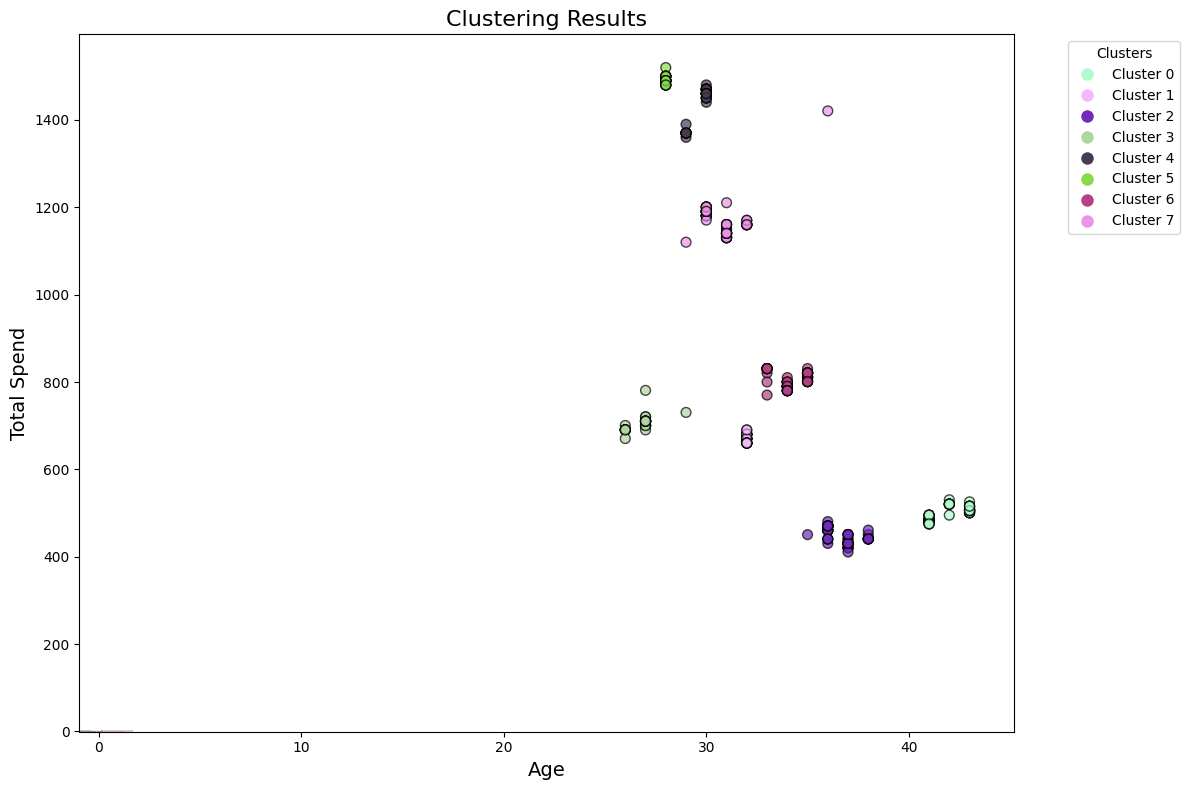

In [47]:
# 1. Age - TotalSpend
plot_clustering_results(
    best_kmeans_age_totalspend,
    age_totalspend.values,
    age_totalspend_orig.values,
    clusters_age_totalspend,
    ['Age', 'Total Spend'],
    figsize=(12, 8)
  )

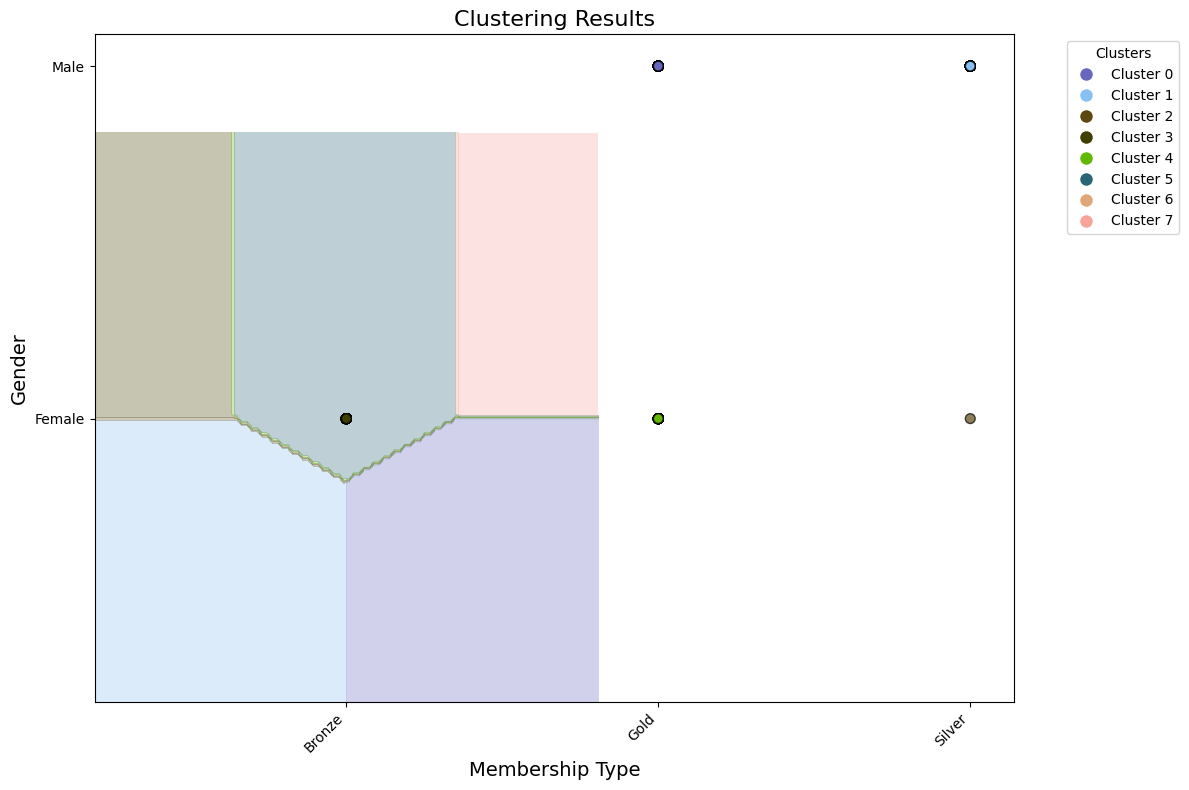

In [49]:
# 2. Membership Type - Gender
plot_clustering_results(
    best_kmeans_memberType_gender,
    memberType_gender.values,
    memberType_gender_orig.values,
    clusters_memberType_gender,
    ['Membership Type', 'Gender'],
    [0, 1],
    figsize=(12, 8)
  )

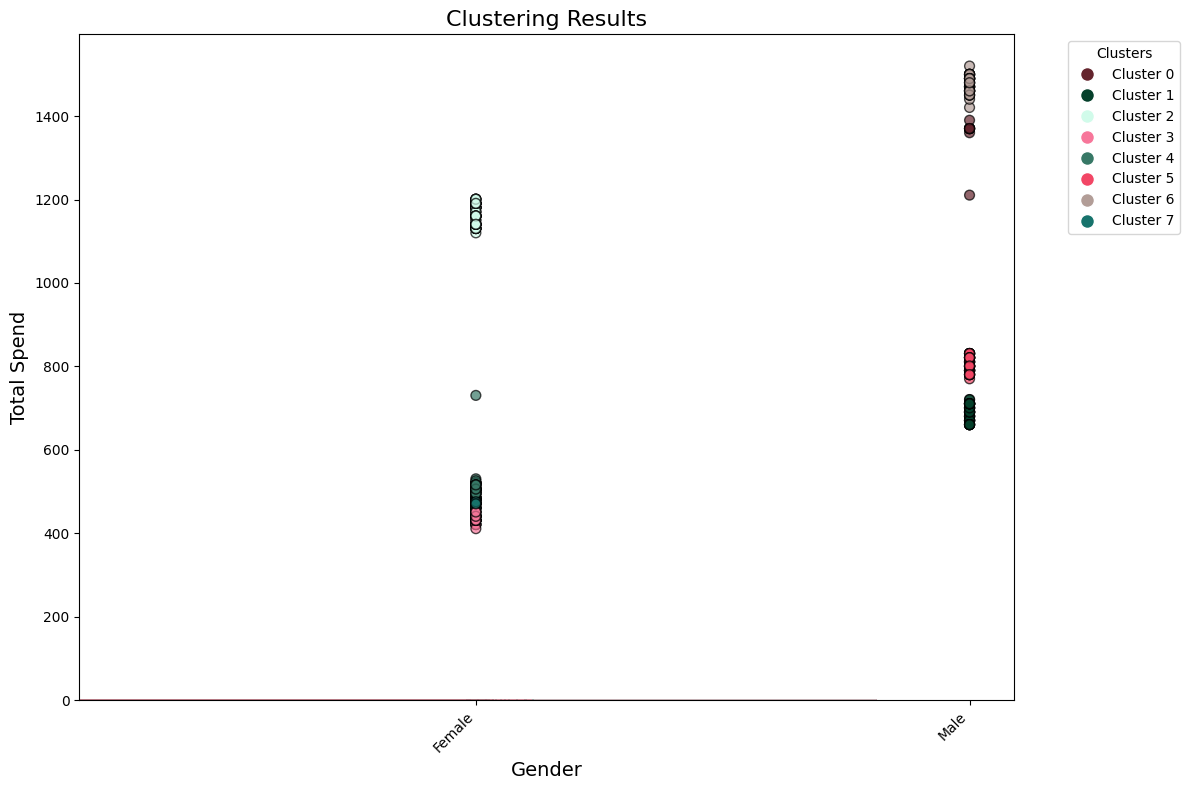

In [50]:
# 3. Gender - Totalspend
plot_clustering_results(
    best_kmeans_gender_totalspend,
    gender_totalspend.values,
    gender_totalspend_orig.values,
    clusters_gender_totalspend,
    ['Gender', 'Total Spend'],
    [0],
    figsize=(12, 8)
  )

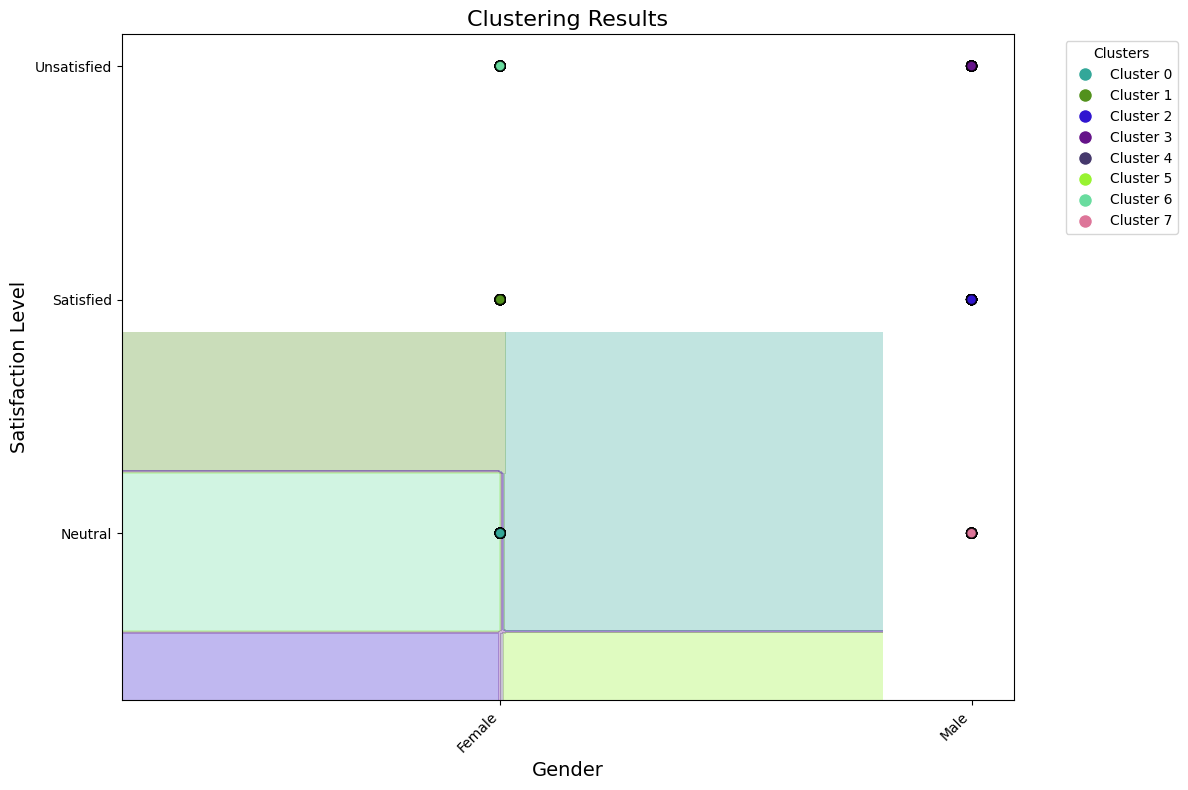

In [52]:
# 4. Gender - SatisfactionLevel
plot_clustering_results(
    best_kmeans_gender_satislvl,
    gender_satislvl.values,
    gender_satislvl_orig.values,
    clusters_gender_satislvl,
    ['Gender', 'Satisfaction Level'],
    [0, 1],
    figsize=(12, 8)
  )

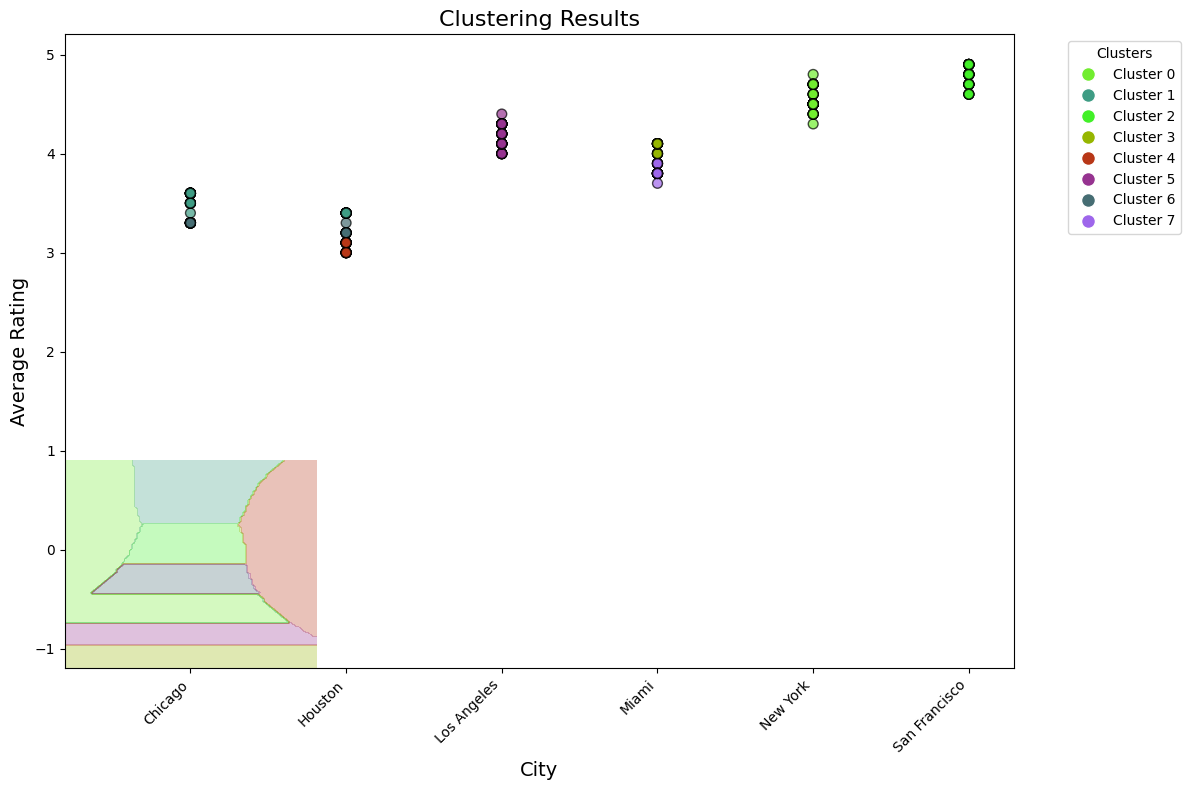

In [53]:
# 5. City - AvgRating
plot_clustering_results(
    best_kmeans_city_avgrating,
    city_avgrating.values,
    city_avgrating_orig.values,
    clusters_city_avgrating,
    ['City', 'Average Rating'],
    [0],
    figsize=(12, 8)
  )

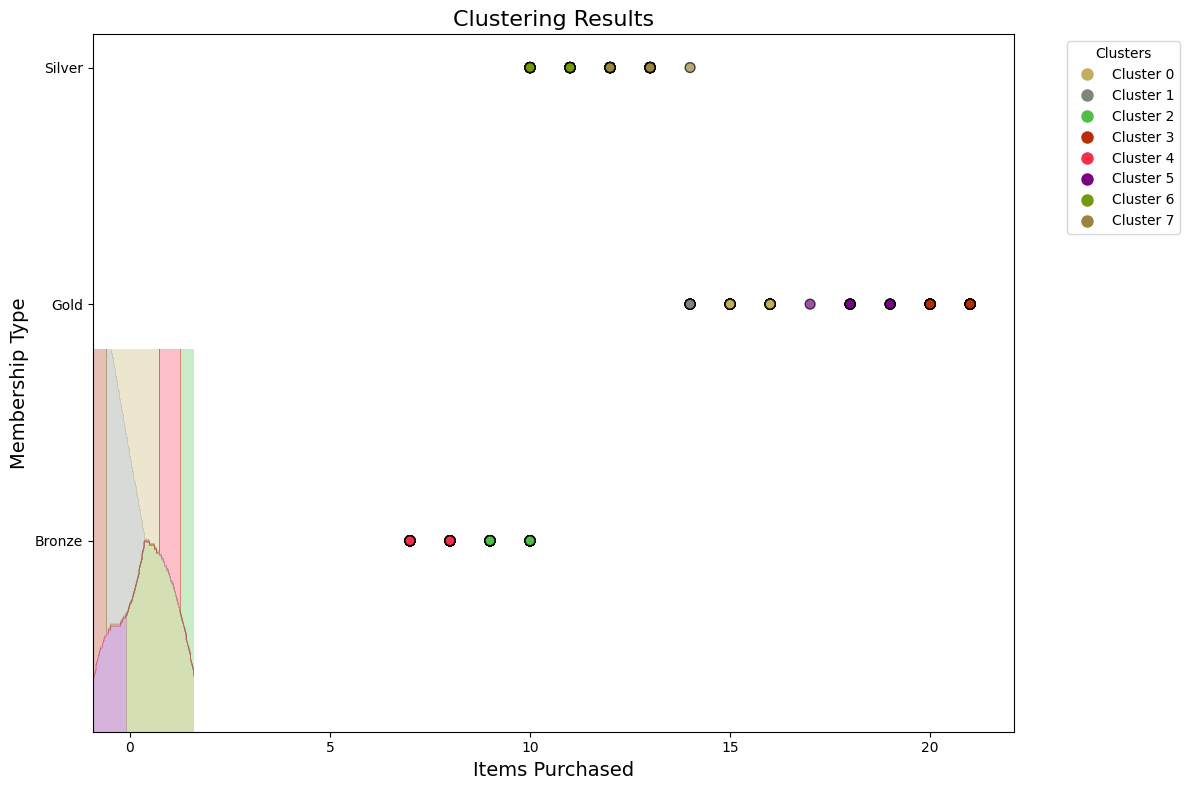

In [55]:
# 6. ItemsPurchased - MembershipType
plot_clustering_results(
    best_kmeans_itemsPurchased_membertype,
    itemsPurchased_membertype.values,
    itemsPurchased_membertype_orig.values,
    clusters_itemsPurchased_membertype,
    ['Items Purchased', 'Membership Type'],
    [1],
    figsize=(12, 8)
  )

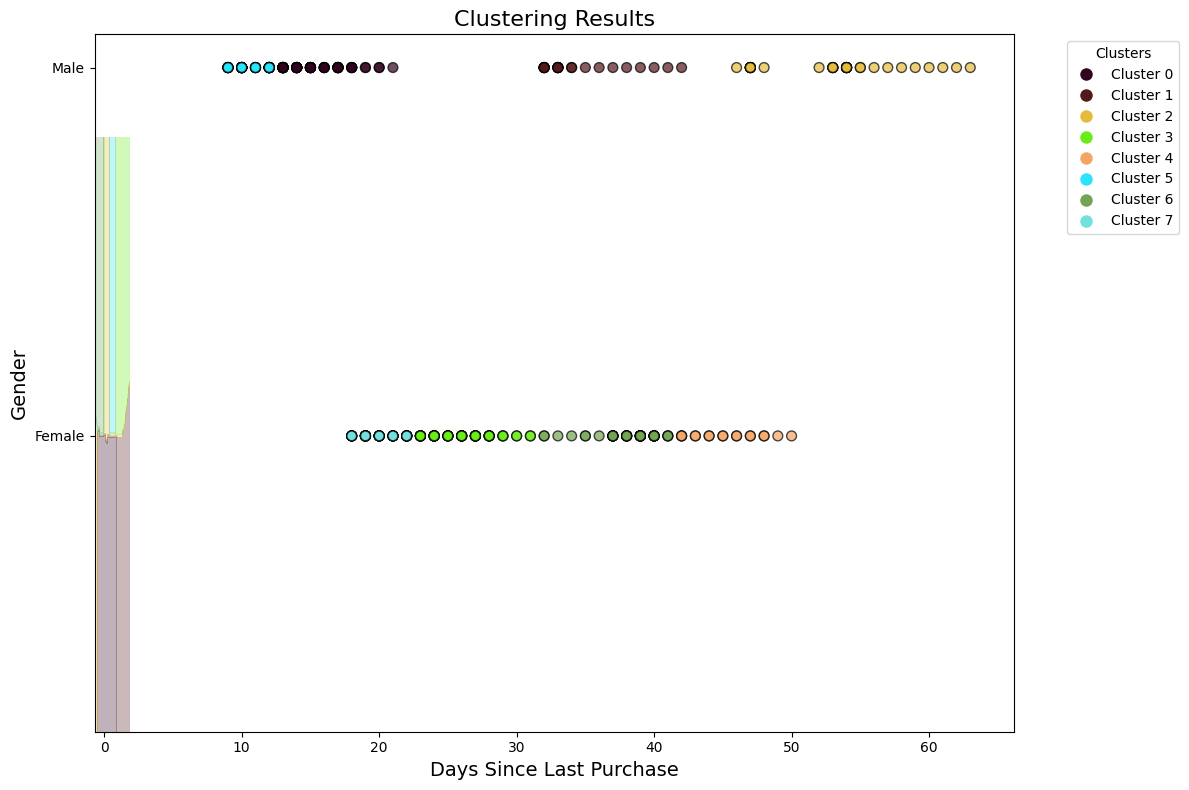

In [56]:
# 7. DaysSinceLastPurchase - Gender
plot_clustering_results(
    best_kmeans_daysSinceLastPurchase_gender,
    daysSinceLastPurchase_gender.values,
    daysSinceLastPurchase_gender_orig.values,
    clusters_daysSinceLastPurchase_gender,
    ['Days Since Last Purchase', 'Gender'],
    [1],
    figsize=(12, 8)
  )